# t-sne 觀察 : 分群

# [教學目標]
- 觀察雙同心圓使用 t-SNE 在不同困惑度 (perplexity) 下的分群效果  
- 因為非監督模型的效果, 較難以簡單的範例看出來  
  所以非監督偶數日提供的範例與作業, 主要目的在於觀察非監督模型的效果,  
  同學只要能感受到模型效果即可, 不用執著於搞懂程式的每一個部分

# [範例重點]
- 使用同心圓的資料, 觀察 t-sne 在不同困惑度 (perplexity) 下, 分群的效果如何變化 (In[4], Out[4])

In [5]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

circles, perplexity=4 in 1.2 sec
circles, perplexity=6 in 1.2 sec
circles, perplexity=9 in 1.2 sec
circles, perplexity=14 in 1.2 sec
circles, perplexity=21 in 1.4 sec
circles, perplexity=30 in 1.5 sec
circles, perplexity=45 in 1.3 sec
circles, perplexity=66 in 1.8 sec
circles, perplexity=100 in 2.1 sec


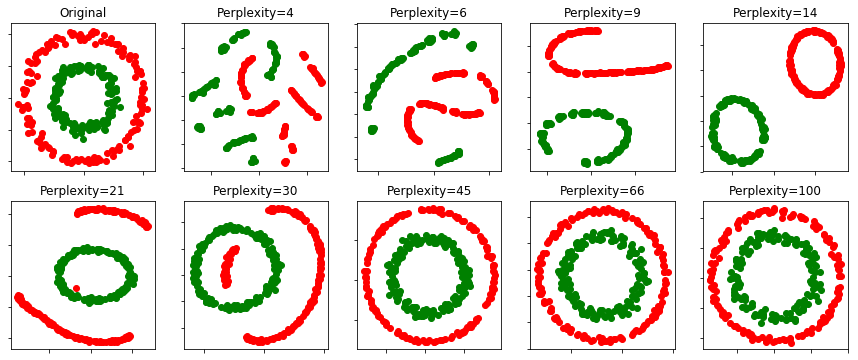

In [39]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100]

# 設定同心圓資料點 
X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
red = y == 0 # 將 y 為 0 的 index set 存成變數 red
green = y == 1 # 將 y 為 1 的 index set 存成變數 green

ax = subplots[0][0]
ax.set_title("Original")
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# 繪製不同 perplexity 下的 t-SNE 分群圖
for i, perplexity in enumerate(perplexities):
    if i<4:
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-4]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    
plt.show()

# 觀察結果
* perplexity 越低時, 圖形越零散, 越高時不僅分群好, 也讓圖形更接近原圖
* 但 perplexity 越高, 執行時間也越久

No handles with labels found to put in legend.


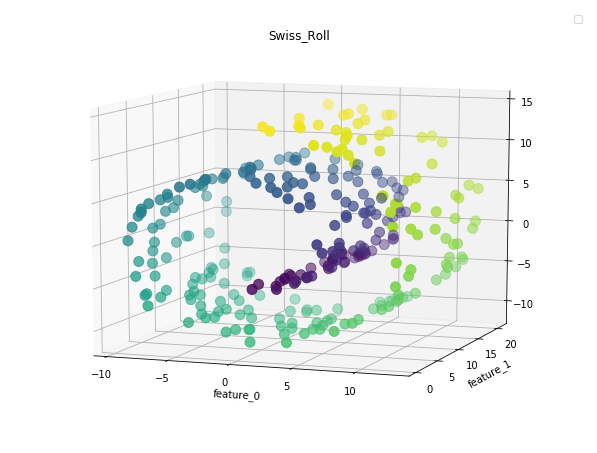

circles, perplexity = 4 in 1.3594024181365967 sec
circles, perplexity = 6 in 1.4829964637756348 sec
circles, perplexity = 9 in 1.4421067237854004 sec
circles, perplexity = 14 in 1.4480936527252197 sec
circles, perplexity = 21 in 1.5238831043243408 sec
circles, perplexity = 30 in 1.692720651626587 sec
circles, perplexity = 45 in 1.4800429344177246 sec
circles, perplexity = 66 in 1.9827003479003906 sec
circles, perplexity = 100 in 2.158229351043701 sec
circles, perplexity = 150 in 2.501272201538086 sec
circles, perplexity = 200 in 2.138284683227539 sec
circles, perplexity = 250 in 2.079441785812378 sec
circles, perplexity = 260 in 1.831129789352417 sec
circles, perplexity = 270 in 1.8301053047180176 sec
circles, perplexity = 280 in 1.8031766414642334 sec
circles, perplexity = 290 in 2.0226290225982666 sec
circles, perplexity = 300 in 1.3164808750152588 sec
circles, perplexity = 400 in 1.3833115100860596 sec


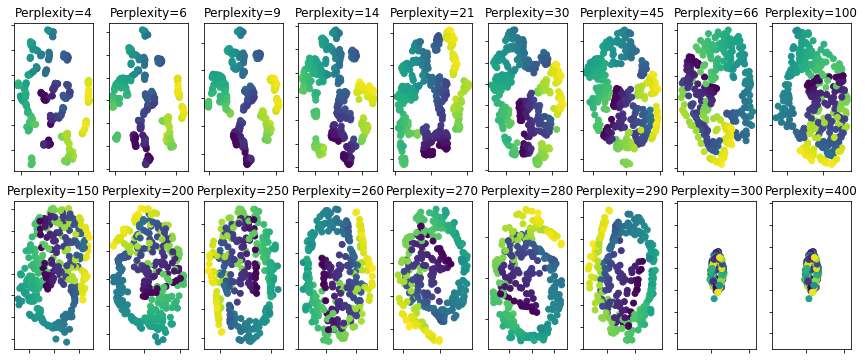

In [43]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100 , 150 , 200 , 250 , 260 , 270 , 280 , 290 , 300 , 400]

X, color = datasets.samples_generator.make_swiss_roll(n_samples, random_state=0)

fignum = 1
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig , rect=[1, 1, 2, 2], elev = 48 , azim = 134)
ax.view_init(10, -70)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 100, c = color)
plt.title('Swiss_Roll')
plt.xlabel('feature_0')
plt.ylabel('feature_1')
plt.legend()
plt.show()


# 繪製資料原圖
(fig, subplots) = plt.subplots(2, 9, figsize=(15, 6))

# 繪製不同 perplexity 下的 t-SNE 分群圖
for i, perplexity in enumerate(perplexities):
    if i < 9:
        ax = subplots[0][i]
    else:
        ax = subplots[1][i-9]

    t0 = time()
    tsne = manifold.TSNE(n_components = n_components ,
                         init='pca',
                         random_state = 0 ,
                         perplexity = perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity = {} in {} sec".format(perplexity , t1 - t0))
    
    ax.set_title("Perplexity={}".format(perplexity))
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
#     ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    
plt.show()

# 觀察結果
* perplexity 越低時, 圖形越零散, 越高時捲曲的形狀越來越明顯，但是高到一個程度後，反而效果變的不是這麼好了
* 但 perplexity 越高, 執行時間會越久，但高到一個程度後，執行的時間反而變快了